# Pedestrian/Person detection using Yolo V3 from COCO Dataset

The code is programed in python 3.7.0 with OpenCV 4.5.1, Numpy 1.19.2, Pandas 1.1.3 and Matplotlib 3.3.2

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Test for image Lena display output for 10000 milli seconds and finishes

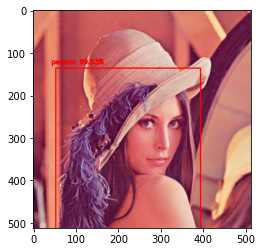

In [5]:
# read input image
#file_path = './TopDown_AerialVideo_1080_000/TopDown_AerialVideo_1080_000.jpg'
file_path = 'lena.jpg'
image = plt.imread(file_path)

# create list the classes from as per coco dataset from file coco.names
classes = None
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]


# get Height and Width of Image
Width = image.shape[1]
Height = image.shape[0]

# read pre-trained model and config file
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# create input blob 
# set input blob for the network
net.setInput(cv2.dnn.blobFromImage(image, 0.00392, (416,416), (0,0,0),  swapRB=True, crop=False))

# run inference through the network
# and gather predictions from output layers

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
outs = net.forward(output_layers)

#print(outs)
# create empty list outputs with class ID, confidence and bounding box
class_ids = []
confidences = []
boxes = []

#create bounding box only if confidence is >= 0.5
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence >= 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

# eliminiate overlapping bounding boxes with lower confidence with condfidence threshold 0.1 and nms threshold 0.1
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)

# check if person detected and display in red bounding box with detection in %age
for i in indices:
    i = i[0]
    box = boxes[i]
    if class_ids[i]==0:
        label = "{}: {:.2f}%".format(classes[class_id], confidences[i] * 100) #str(classes[class_id])+' '+str(confidences[i]) "{}: {:.2f}%".format(classes[idx],score * 100) 
        cv2.rectangle(image, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (255, 0, 0), 2)
        cv2.putText(image, label, (round(box[0])-10,round(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# display for 10000 milli seconds and save image 
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite('output.jpg', im_rgb) 
plt.imshow(image)
cv2.imshow("Yolo Person detection", im_rgb)
cv2.waitKey(10000)
cv2.destroyAllWindows()

### Test for video with output filename  = Output + input filename

In [3]:
# read input video
file_path = 'TopDown_AerialVideo_1080.mp4'
cap = cv2.VideoCapture(file_path)

# Output file name
output_path = 'Output_'+file_path

# Define the codec,fps, size and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
fps = cap.get(cv2.CAP_PROP_FPS)
Height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
Width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

size = (Width, Height)
vout = cv2.VideoWriter(output_path, 0, fourcc, fps, size, True)

# checking for the frame
while(cv2.waitKey(1) < 0):
    
    ret, frame = cap.read()
    
    # checking if ret is false, release all memory and exit the program
    if not ret:
        cv2.waitKey(1000)
        cap.release()
        vout.release()
        cv2.destroyAllWindows()
        break
        
    # read pre-trained model and config file
    net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

    # create input blob 
    # set input blob for the network
    net.setInput(cv2.dnn.blobFromImage(frame, 0.00392, (416,416), (0,0,0),  swapRB=True, crop=False))

    # run inference through the network
    # and gather predictions from output layers
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    outs = net.forward(output_layers)


    # create empty list outputs with class ID, confidence and bounding box
    class_ids = []
    confidences = []
    boxes = []

    #create bounding box only if confidence is >= 0.5
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence >= 0.5:
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)      
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    # eliminiate overlapping bounding boxes with lower confidence with condfidence threshold 0.1 and nms threshold 0.1
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)

    # check if person detected and display in red bounding box with detection in %age
    for i in indices:
        i = i[0]
        box = boxes[i]
        if class_ids[i]==0:
            label = "{}: {:.2f}%".format(classes[class_id], confidences[i] * 100) #str(classes[class_id])+' '+str(confidences[i]) "{}: {:.2f}%".format(classes[idx],score * 100) 
            cv2.rectangle(frame, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (0, 0, 255), 2)
            cv2.putText(frame, label, (round(box[0])-10,round(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # display and save video  
    vout.write(frame)
    cv2.imshow('Yolo Person detection',frame)
        
print("The video was successfully saved") 

The video was successfully saved
